## Design a Low-Pass Filter with f_cutoff = 48 MHz.

 

Generate random noise with a sampling frequency of 200 MHz and a total length of 100 microseconds.

Implement a low-pass filter of length M=50 with a cutoff frequency of 48 MHz. Calculate the impulse response of the filter.

Apply the impulse response to your generated noise.

Make a Fourier transform of your filtered noise and produce a plot of the frequency spectrum.

Make the same plot for a filter of length M=200 and discuss the results.

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft,irfft


Generate random noise with a sampling frequency of 200 MHz and a total length of 100 microseconds.


In [2]:
f=200*10**6
T=100*10**(-6)
f_cutoff=48*10**6
n=int(T*f)

t=np.linspace(0,T,n)
signal=np.sin(2*np.pi*f*t)
for i in range(n):
    signal[i]+=np.random.normal(0,1)

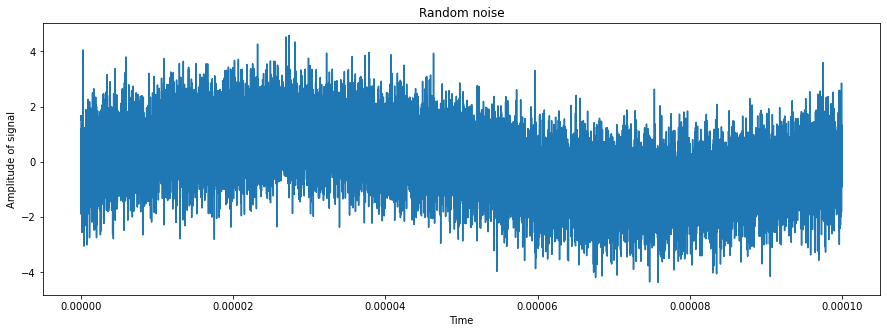

In [3]:
plt.figure(figsize=(15,5))
plt.plot(t,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude of signal")
plt.title("Random noise")
plt.show()

Implement a low-pass filter of length M=50 with a cutoff frequency of 48 MHz. Calculate the impulse response of the filter.

In [4]:
#I choose to implement the low pass filter with a sinc function and the Blackmann window to get pretty results
#Because if I use hn=(np.sin(2*np.pi*f_cutoff*(n-(M/2))))/(np.pi*(n-(M/2))) from the slides, I get weird results...
#https://tomroelandts.com/articles/how-to-create-a-simple-low-pass-filter
M=50
N=M+1 

fc = 0.24  # Cutoff frequency as a fraction of the sampling rate (=48 MHz/200MHz).
b = 0.08  # Transition band, as a fraction of the sampling rate (=4/N).
n50 = np.arange(N)
 

In [5]:
def sinc_Blackman(N,n):
    # Sinc filter.
    h = np.sinc(2 * fc * (n - (N - 1) / 2))
 
    # Blackman window.
    w = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    # Multiply sinc filter by window.
    h = h * w
    # Normalize to get unity gain.
    h = h / np.sum(h)
    return h

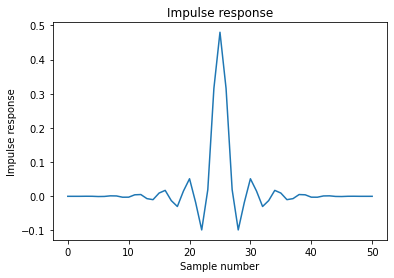

In [6]:
h50=sinc_Blackman(51,n50)
plt.plot(n50,h50)
plt.xlabel("Sample number")
plt.ylabel("Impulse response")
plt.title("Impulse response")
plt.show()

Apply the impulse response to your generated noise.


In [7]:
signal_filtered50 = np.convolve(signal, h50)

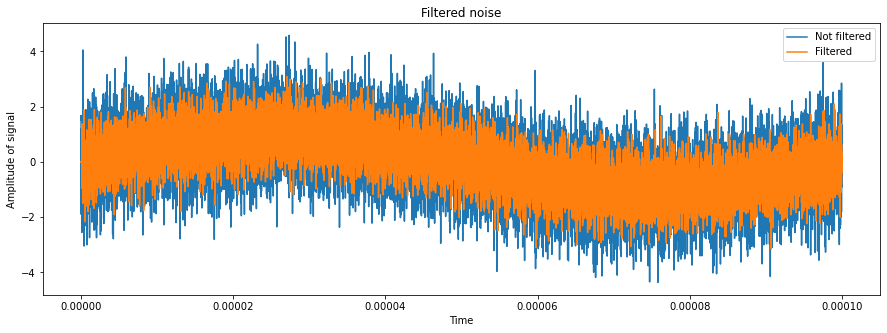

In [8]:
plt.figure(figsize=(15,5))
plt.plot(t,signal,label="Not filtered")
plt.plot(t,signal_filtered50[0:len(t)],label="Filtered")
plt.xlabel("Time")
plt.ylabel("Amplitude of signal")
plt.title("Filtered noise")
plt.legend()
plt.show()

Make a Fourier transform of your filtered noise and produce a plot of the frequency spectrum.

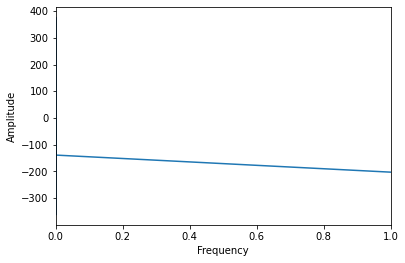

In [9]:
signal_filter_fourier50=rfft(signal_filtered50)
signal_filter_fourier50=signal_filter_fourier50.real
freq=rfft(t)
freq=freq.real
plt.plot(freq,signal_filter_fourier50[0:len(freq)])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,1)
plt.show()

Make the same plot for a filter of length M=200 and discuss the results.


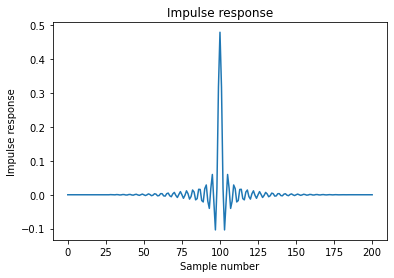

In [10]:
n200 = np.arange(201)
h200=sinc_Blackman(201,n200)
plt.plot(n200,h200)
plt.xlabel("Sample number")
plt.ylabel("Impulse response")
plt.title("Impulse response")
plt.show()

In [11]:
signal_filtered200 = np.convolve(signal, h200)

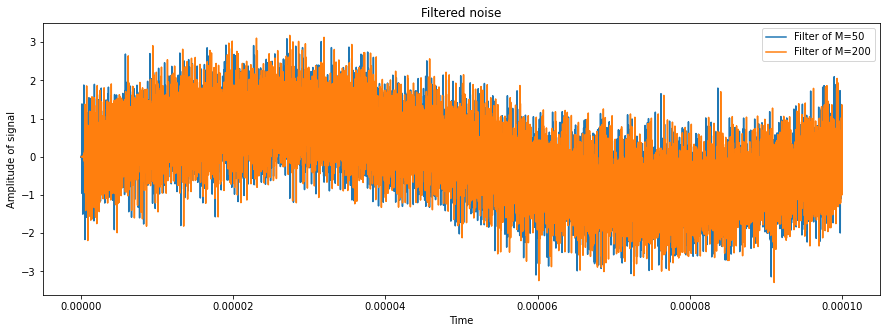

In [22]:
plt.figure(figsize=(15,5))
plt.plot(t,signal_filtered50[0:len(t)],label="Filter of M=50")
plt.plot(t,signal_filtered200[0:len(t)],label="Filter of M=200")
plt.xlabel("Time")
plt.ylabel("Amplitude of signal")
plt.title("Filtered noise")
plt.legend()
plt.show()

In [27]:
#With this plot, we see that the filtered signal is shifted in time. The length of the filter thus causes a shift. 
#This is indeed what we expected

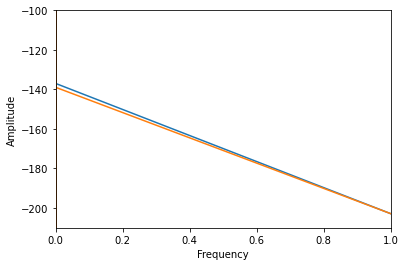

In [26]:
signal_filter_fourier200=rfft(signal_filtered200)
signal_filter_fourier200=signal_filter_fourier200.real
freq=rfft(t)
freq=freq.real
plt.plot(freq,signal_filter_fourier200[0:len(freq)])
plt.plot(freq,signal_filter_fourier50[0:len(freq)])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,1)
plt.ylim(-210,-100)
plt.show()